In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum().sort_values(ascending= False)

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


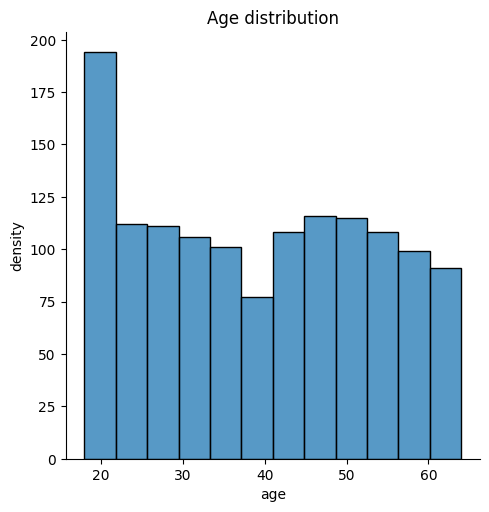

In [9]:
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

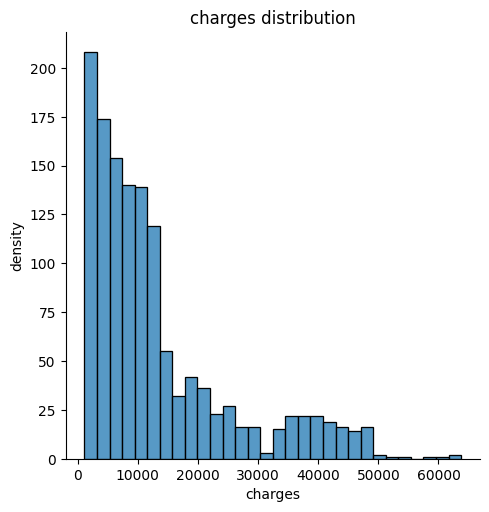

In [10]:
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

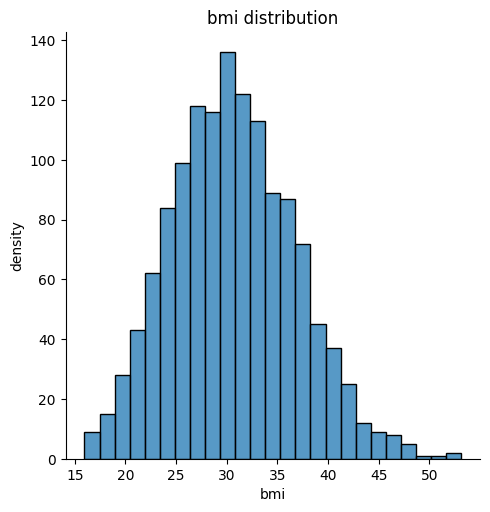

In [11]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

In [15]:

df['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


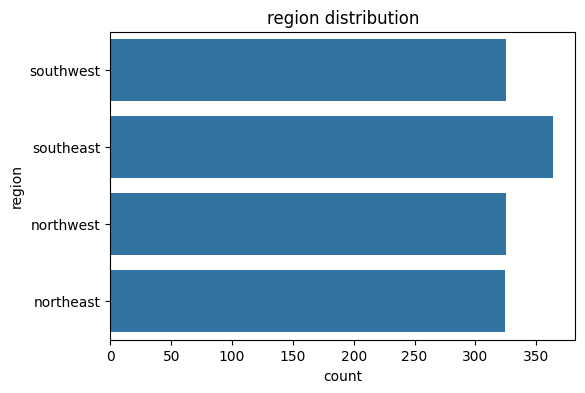

In [16]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('region distribution')
plt.show()

In [17]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


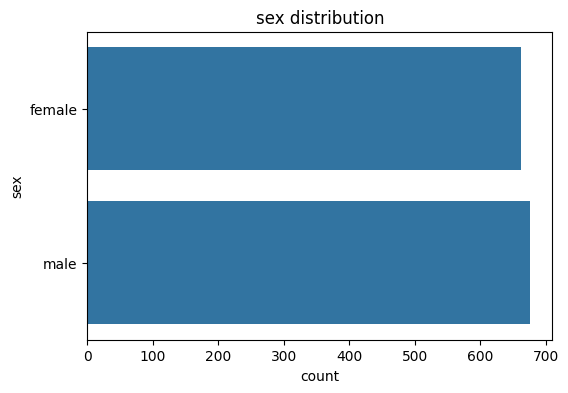

In [18]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
plt.title('sex distribution')
plt.show()

In [19]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


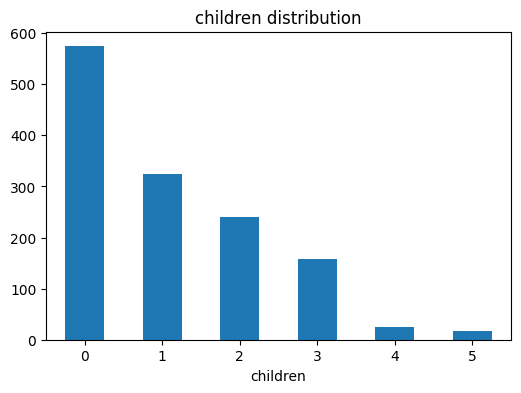

In [21]:
fig = plt.figure(figsize = (6,4))
df['children'].value_counts().plot(kind="bar")
plt.title('children distribution')
plt.xticks(rotation = 0)
plt.show()

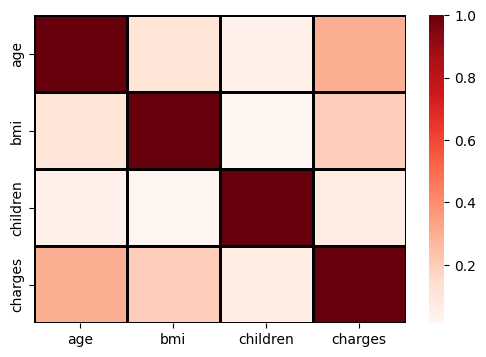

In [27]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.select_dtypes(include=np.number).corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

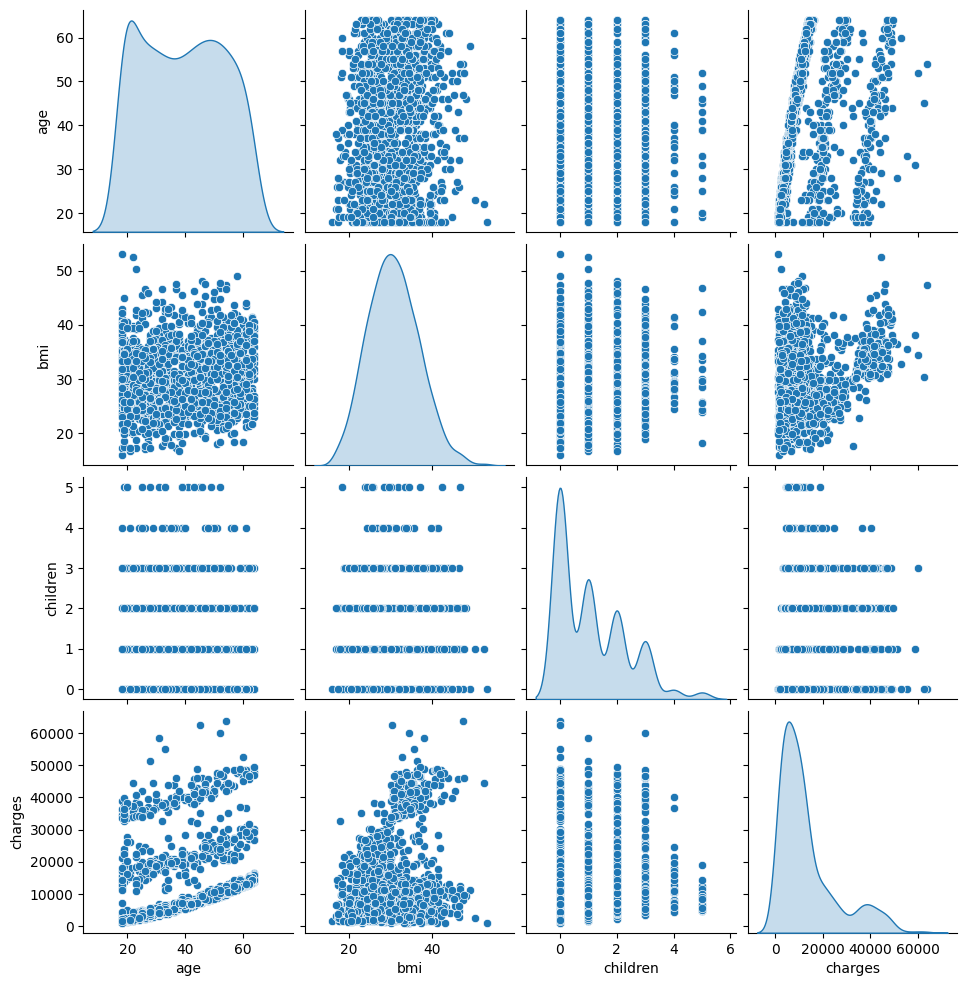

In [28]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [29]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# Select categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure columns are aligned after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Apply StandardScaler to the encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

display(X_train_scaled)
display(X_test_scaled)

array([[ 0.92799531,  1.24941097,  0.75674405, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [ 0.21473894,  0.85643216,  0.75674405, ..., -0.58557505,
         1.65650234, -0.55266566],
       [ 0.85666968,  1.43204012, -0.08248869, ..., -0.58557505,
        -0.60368161,  1.80941223],
       ...,
       [ 1.2846235 ,  0.53683114, -0.92172142, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [ 0.92799531,  1.10999318,  0.75674405, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [-0.21321489, -1.77130785, -0.92172142, ..., -0.58557505,
        -0.60368161, -0.55266566]])

array([[-0.07056361,  1.03253885, -0.08248869, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [-1.35442509, -0.31516647, -0.92172142, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [ 1.07064659, -0.85734677, -0.08248869, ..., -0.58557505,
        -0.60368161, -0.55266566],
       ...,
       [ 1.56992605, -0.13009139,  1.59597679, ..., -0.58557505,
         1.65650234, -0.55266566],
       [-0.92647126, -1.38403621, -0.92172142, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [-1.06912254, -1.32370336, -0.92172142, ..., -0.58557505,
        -0.60368161,  1.80941223]])

In [36]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,3.987963e+03
MSE_li_reg,3.368366e+07
RMSE_li_reg,5.803763e+03


In [38]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88767236 0.85554565 0.84393954 0.87218569 0.84343467]


In [39]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7602196966782768

In [40]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [41]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.524436e+03
MSE_gradient,2.115408e+07
RMSE_gradient,4.599356e+03


In [42]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94551062 0.91603191 0.92099362 0.92316263 0.91499459]


In [43]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.8494126988165114

In [44]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

In [45]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,3.155483e+03
MSE_XGB,2.986226e+07
RMSE_XGB,5.464637e+03


In [46]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.92150068 0.88890406 0.90176777 0.90424131 0.88745625]


In [47]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.7874226837863824

In [48]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [49]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.518335e+03
MSE_tree_reg,5.122152e+07
RMSE_tree_reg,7.156921e+03


In [50]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.89975932 0.80475549 0.80701232 0.85468228 0.82461985]


In [51]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6353747518218973

In [52]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [53]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.907151e+03
MSE_forest_reg,2.521107e+07
RMSE_forest_reg,5.021063e+03


In [54]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94069941 0.90204011 0.92100711 0.91568492 0.90095122]


In [56]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8205326100756158